# 💡 Smart Lighting Insights & Optimization using AI
This notebook uses the CU-BEMS `2019Floor1.csv` dataset to analyze and optimize smart lighting in a building using AI/ML.

In [2]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import streamlit as st

In [3]:
# 📂 Step 2: Load and Explore Data
df = pd.read_csv('2019Floor1.csv')
df.head()

,Date,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
0,2019-01-01 00:00:00,0.03,0.58,2.31,21.15,0.01,0.02,17.37,15.20,10.01,0.38,14.58
1,2019-01-01 00:01:00,0.00,0.58,2.31,35.07,0.00,0.02,17.34,19.16,9.98,0.37,14.57
2,2019-01-01 00:02:00,0.02,0.58,30.96,34.37,0.01,0.03,17.31,19.02,9.98,0.38,14.62
3,2019-01-01 00:03:00,0.00,0.57,51.32,18.91,0.01,0.01,17.39,18.85,10.01,0.37,14.60
4,2019-01-01 00:04:00,0.01,0.56,48.87,1.35,0.01,0.01,17.48,18.57,10.05,0.38,14.60


In [4]:
df.columns
# ✅ Convert 'Date' column to datetime and set as index
df['timestamp'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['timestamp'])
df = df.set_index('timestamp')
df = df.drop(columns=['Date'])  # drop original 'Date' column
df = df.sort_index()
df = df.ffill()  # forward fill missing values

df.head()

,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
timestamp,,,,,,,,,,,
2019-01-01 00:00:00,0.03,0.58,2.31,21.15,0.01,0.02,17.37,15.20,10.01,0.38,14.58
2019-01-01 00:01:00,0.00,0.58,2.31,35.07,0.00,0.02,17.34,19.16,9.98,0.37,14.57
2019-01-01 00:02:00,0.02,0.58,30.96,34.37,0.01,0.03,17.31,19.02,9.98,0.38,14.62
2019-01-01 00:03:00,0.00,0.57,51.32,18.91,0.01,0.01,17.39,18.85,10.01,0.37,14.60
2019-01-01 00:04:00,0.01,0.56,48.87,1.35,0.01,0.01,17.48,18.57,10.05,0.38,14.60


In [6]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

z1_Light(kW)    0
z1_Plug(kW)     0
z2_AC1(kW)      0
z2_AC2(kW)      0
z2_AC3(kW)      0
z2_AC4(kW)      0
z2_Light(kW)    0
z2_Plug(kW)     0
z3_Light(kW)    0
z3_Plug(kW)     0
z4_Light(kW)    0
dtype: int64

In [7]:
# Quick statistical summary
df.describe()

,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,6.364553,1.550223,27.550822,5.277093,0.007803,0.007304,8.116852,14.908126,20.918582,1.221742,16.073038
std,8.485215,2.550713,22.292953,13.027473,0.004531,0.008615,3.318273,4.092230,11.401094,0.647512,16.823400
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.960000,0.010000,0.000000,0.000000
25%,0.010000,0.020000,0.030000,0.020000,0.010000,0.000000,5.900000,12.230000,12.240000,0.820000,0.060000
50%,0.020000,0.680000,44.070000,0.030000,0.010000,0.010000,7.420000,14.520000,18.180000,0.990000,14.530000
75%,11.860000,1.060000,46.810000,0.030000,0.010000,0.010000,9.430000,17.230000,22.570000,1.750000,30.270000
max,60.930000,28.820000,104.480000,79.470000,0.020000,0.050000,37.180000,73.680000,105.670000,15.720000,66.480000


In [8]:
# Ensure all columns are numeric where appropriate
df.dtypes

z1_Light(kW)    float64
z1_Plug(kW)     float64
z2_AC1(kW)      float64
z2_AC2(kW)      float64
z2_AC3(kW)      float64
z2_AC4(kW)      float64
z2_Light(kW)    float64
z2_Plug(kW)     float64
z3_Light(kW)    float64
z3_Plug(kW)     float64
z4_Light(kW)    float64
dtype: object

In [10]:
# Convert all columns (except index) to numeric if needed
df = df.apply(pd.to_numeric, errors='coerce')

# Make sure timestamps are unique
duplicates = df.index.duplicated().sum()
print(f"Duplicate timestamps: {duplicates}")


Duplicate timestamps: 0


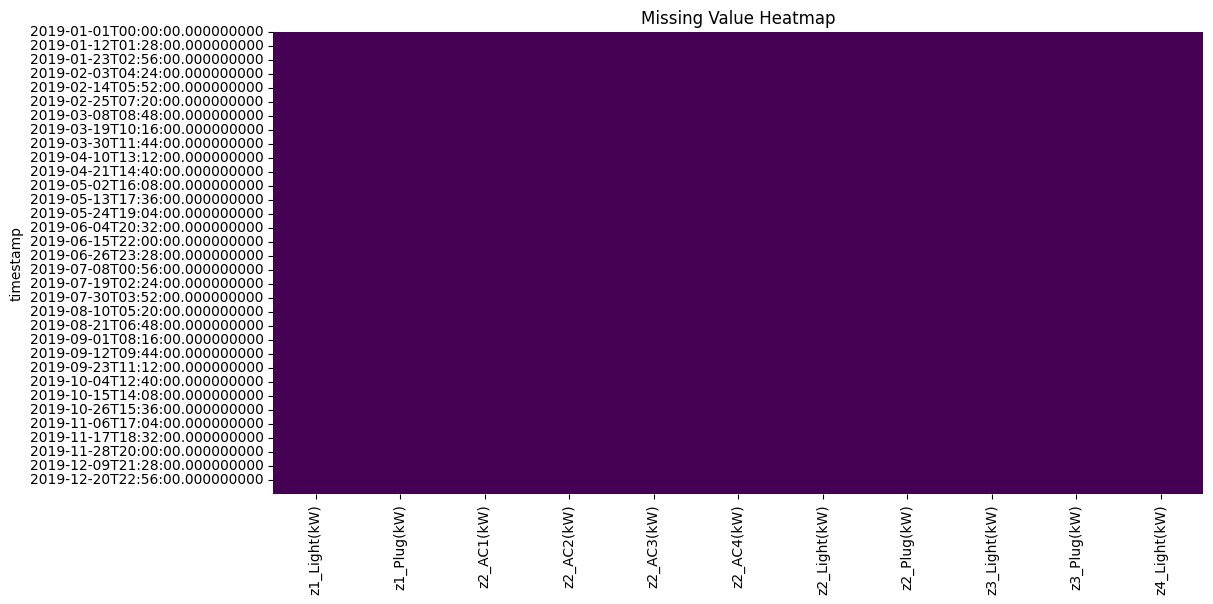

In [11]:
# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

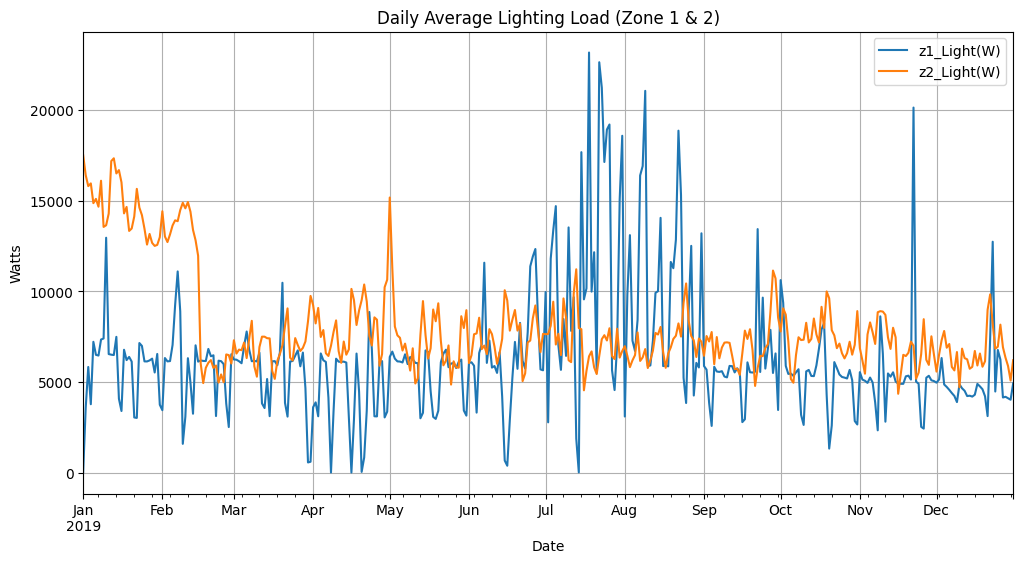

In [12]:
# 📊 Step 4: Data Analysis & Visualization
# Convert kW to W (multiply by 1000)
df['z1_Light(W)'] = df['z1_Light(kW)'] * 1000
df['z2_Light(W)'] = df['z2_Light(kW)'] * 1000

# Resample to daily average and plot
plt.figure(figsize=(12, 6))
df[['z1_Light(W)', 'z2_Light(W)']].resample('D').mean().plot(ax=plt.gca())
plt.title('Daily Average Lighting Load (Zone 1 & 2)')
plt.ylabel('Watts')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [15]:
# 🧠 Step 5: Machine Learning - Predict Lighting Usage
# Make sure your datetime index is in place
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek

# Convert light to watts if not already done
if 'z1_Light(W)' not in df.columns:
    df['z1_Light(W)'] = df['z1_Light(kW)'] * 1000

# Define features and target
features = ['hour', 'dayofweek']
target = 'z1_Light(W)'

X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(f'✅ R² Score: {r2_score(y_test, y_pred):.2f}')
print(f'✅ Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')

✅ R² Score: 0.36
✅ Mean Squared Error: 45878482.43


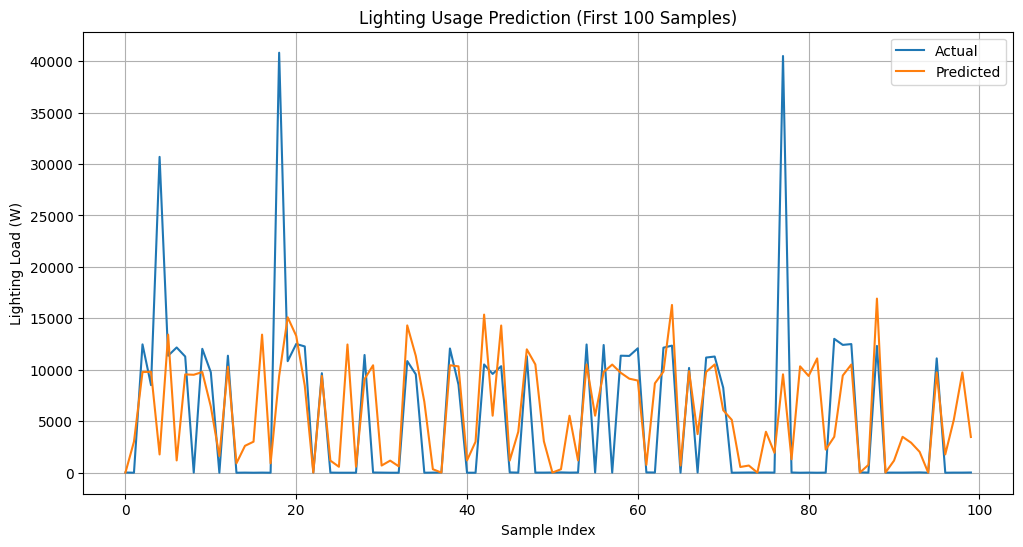

In [21]:
# 📈 Step 6: Plot Predictions vs Actual

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('Lighting Usage Prediction (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Lighting Load (W)')
plt.legend()
plt.grid(True)
plt.show()


# 🖥️ Step 7: Streamlit Dashboard (app.py)
You can deploy a dashboard using the following Streamlit script in a separate `app.py` file:

In [23]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.title('💡 Smart Lighting Insights Dashboard')

# Load and preprocess data
df = pd.read_csv('2019Floor1.csv')
df['timestamp'] = pd.to_datetime(df['Date'])  # Fix here
df = df.set_index('timestamp')
df = df.fillna(method='ffill')

# Select a zone
zone = st.selectbox('Select Zone', ['z1_Light(kW)', 'z2_Light(kW)', 'z3_Light(kW)', 'z4_Light(kW)'])

# Daily average
df_daily = df[[zone]].resample('D').mean()

# Show chart
st.line_chart(df_daily)

2025-06-20 12:09:19.844 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 12:09:19.845 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
C:\Users\priyanka\AppData\Local\Temp\ipykernel_13496\1689703595.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
2025-06-20 12:09:20.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 12:09:20.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 12:09:20.829 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 12:09:20.829 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025

DeltaGenerator()